# Importing Libraries

In [5]:
from numpy.random import seed
seed(101)

import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
tf.random.set_seed(101)

In [6]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization

# Read Data from the csv file using pandas

In [31]:
df_data = pd.read_csv('input/train_labels.csv')
df_data.head()

,id,label
0,f38a6374c348f90b587e046aac6079959adf3835,0
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77,1
2,755db6279dae599ebb4d39a9123cce439965282d,0
3,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08,0
4,068aba587a4950175d04c680d38943fd488d6a9d,0


In [32]:
df_data.isnull().sum()

id       0
label    0
dtype: int64

In [33]:
df = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data')
df.columns = ['id', 'clump_thickness', 'unif_cell_size', 'unif_cell_shape', 'marg_adhesion', 'single_epith_size',
              'bare_nuclei', 'bland_chrom', 'norm_nucleoli', 'mitoses', 'class']
df.head()

,id,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [34]:
df.drop(['id'], inplace=True, axis=1)
df["bare_nuclei"] = df["bare_nuclei"].str.replace("?", "0", regex=True)
df["bare_nuclei"] = df["bare_nuclei"].astype(int)
df.head()

,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
0,5,4,4,5,7,10,3,2,1,2
1,3,1,1,1,2,2,3,1,1,2
2,6,8,8,1,3,4,3,7,1,2
3,4,1,1,3,2,1,3,1,1,2
4,8,10,10,8,7,10,9,7,1,4


In [35]:
df_data.shape

(220025, 2)

In [36]:
df.shape

(698, 10)

In [37]:
df['class'] = df['class'].map(lambda x: 1 if x == 4 else 0)
df.head()

,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
0,5,4,4,5,7,10,3,2,1,0
1,3,1,1,1,2,2,3,1,1,0
2,6,8,8,1,3,4,3,7,1,0
3,4,1,1,3,2,1,3,1,1,0
4,8,10,10,8,7,10,9,7,1,1


# DESCRIPTIVE DATA ANALYSIS

In [38]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
clump_thickness,698.0,4.416905,2.817673,1.0,2.0,4.0,6.0,10.0
unif_cell_size,698.0,3.137536,3.052575,1.0,1.0,1.0,5.0,10.0
unif_cell_shape,698.0,3.210602,2.972867,1.0,1.0,1.0,5.0,10.0
marg_adhesion,698.0,2.809456,2.856606,1.0,1.0,1.0,4.0,10.0
single_epith_size,698.0,3.217765,2.215408,1.0,2.0,2.0,4.0,10.0
bare_nuclei,698.0,3.467049,3.642122,0.0,1.0,1.0,5.0,10.0
bland_chrom,698.0,3.438395,2.440056,1.0,2.0,3.0,5.0,10.0
norm_nucleoli,698.0,2.869628,3.055004,1.0,1.0,1.0,4.0,10.0
mitoses,698.0,1.590258,1.716162,1.0,1.0,1.0,1.0,10.0
class,698.0,0.345272,0.475798,0.0,0.0,0.0,1.0,1.0


# EXPLORATORY DATA ANALYSIS

Text(0.5, 0, '')

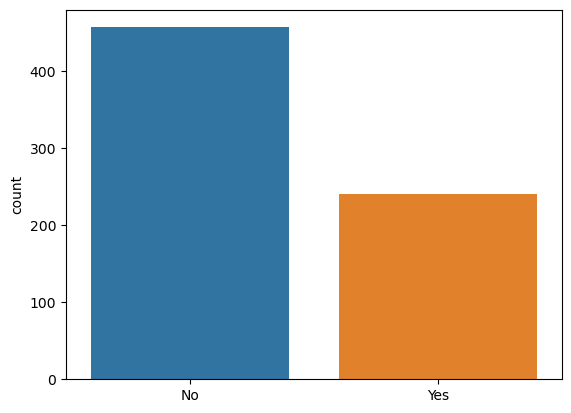

In [39]:
# visualize the count
f = sns.countplot(x=df["class"], data=df, label="count", )
f.set_xticklabels(["No", "Yes"])
plt.xlabel("")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

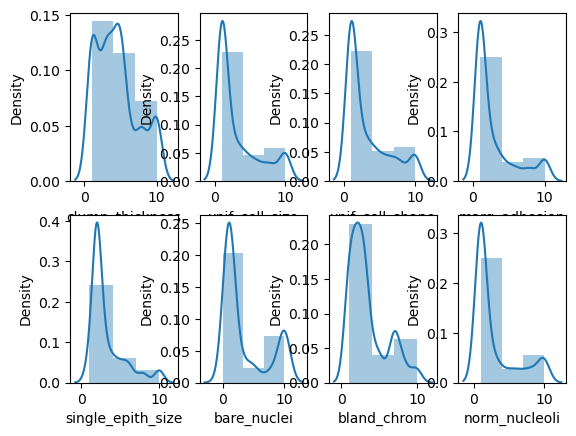

In [40]:
fig, axes = plt.subplots(nrows=2, ncols=4)
for i, column in enumerate(df.columns[0:8]):
    sns.distplot(df[column], kde=True,bins=3,ax=axes[i//4,i%4])

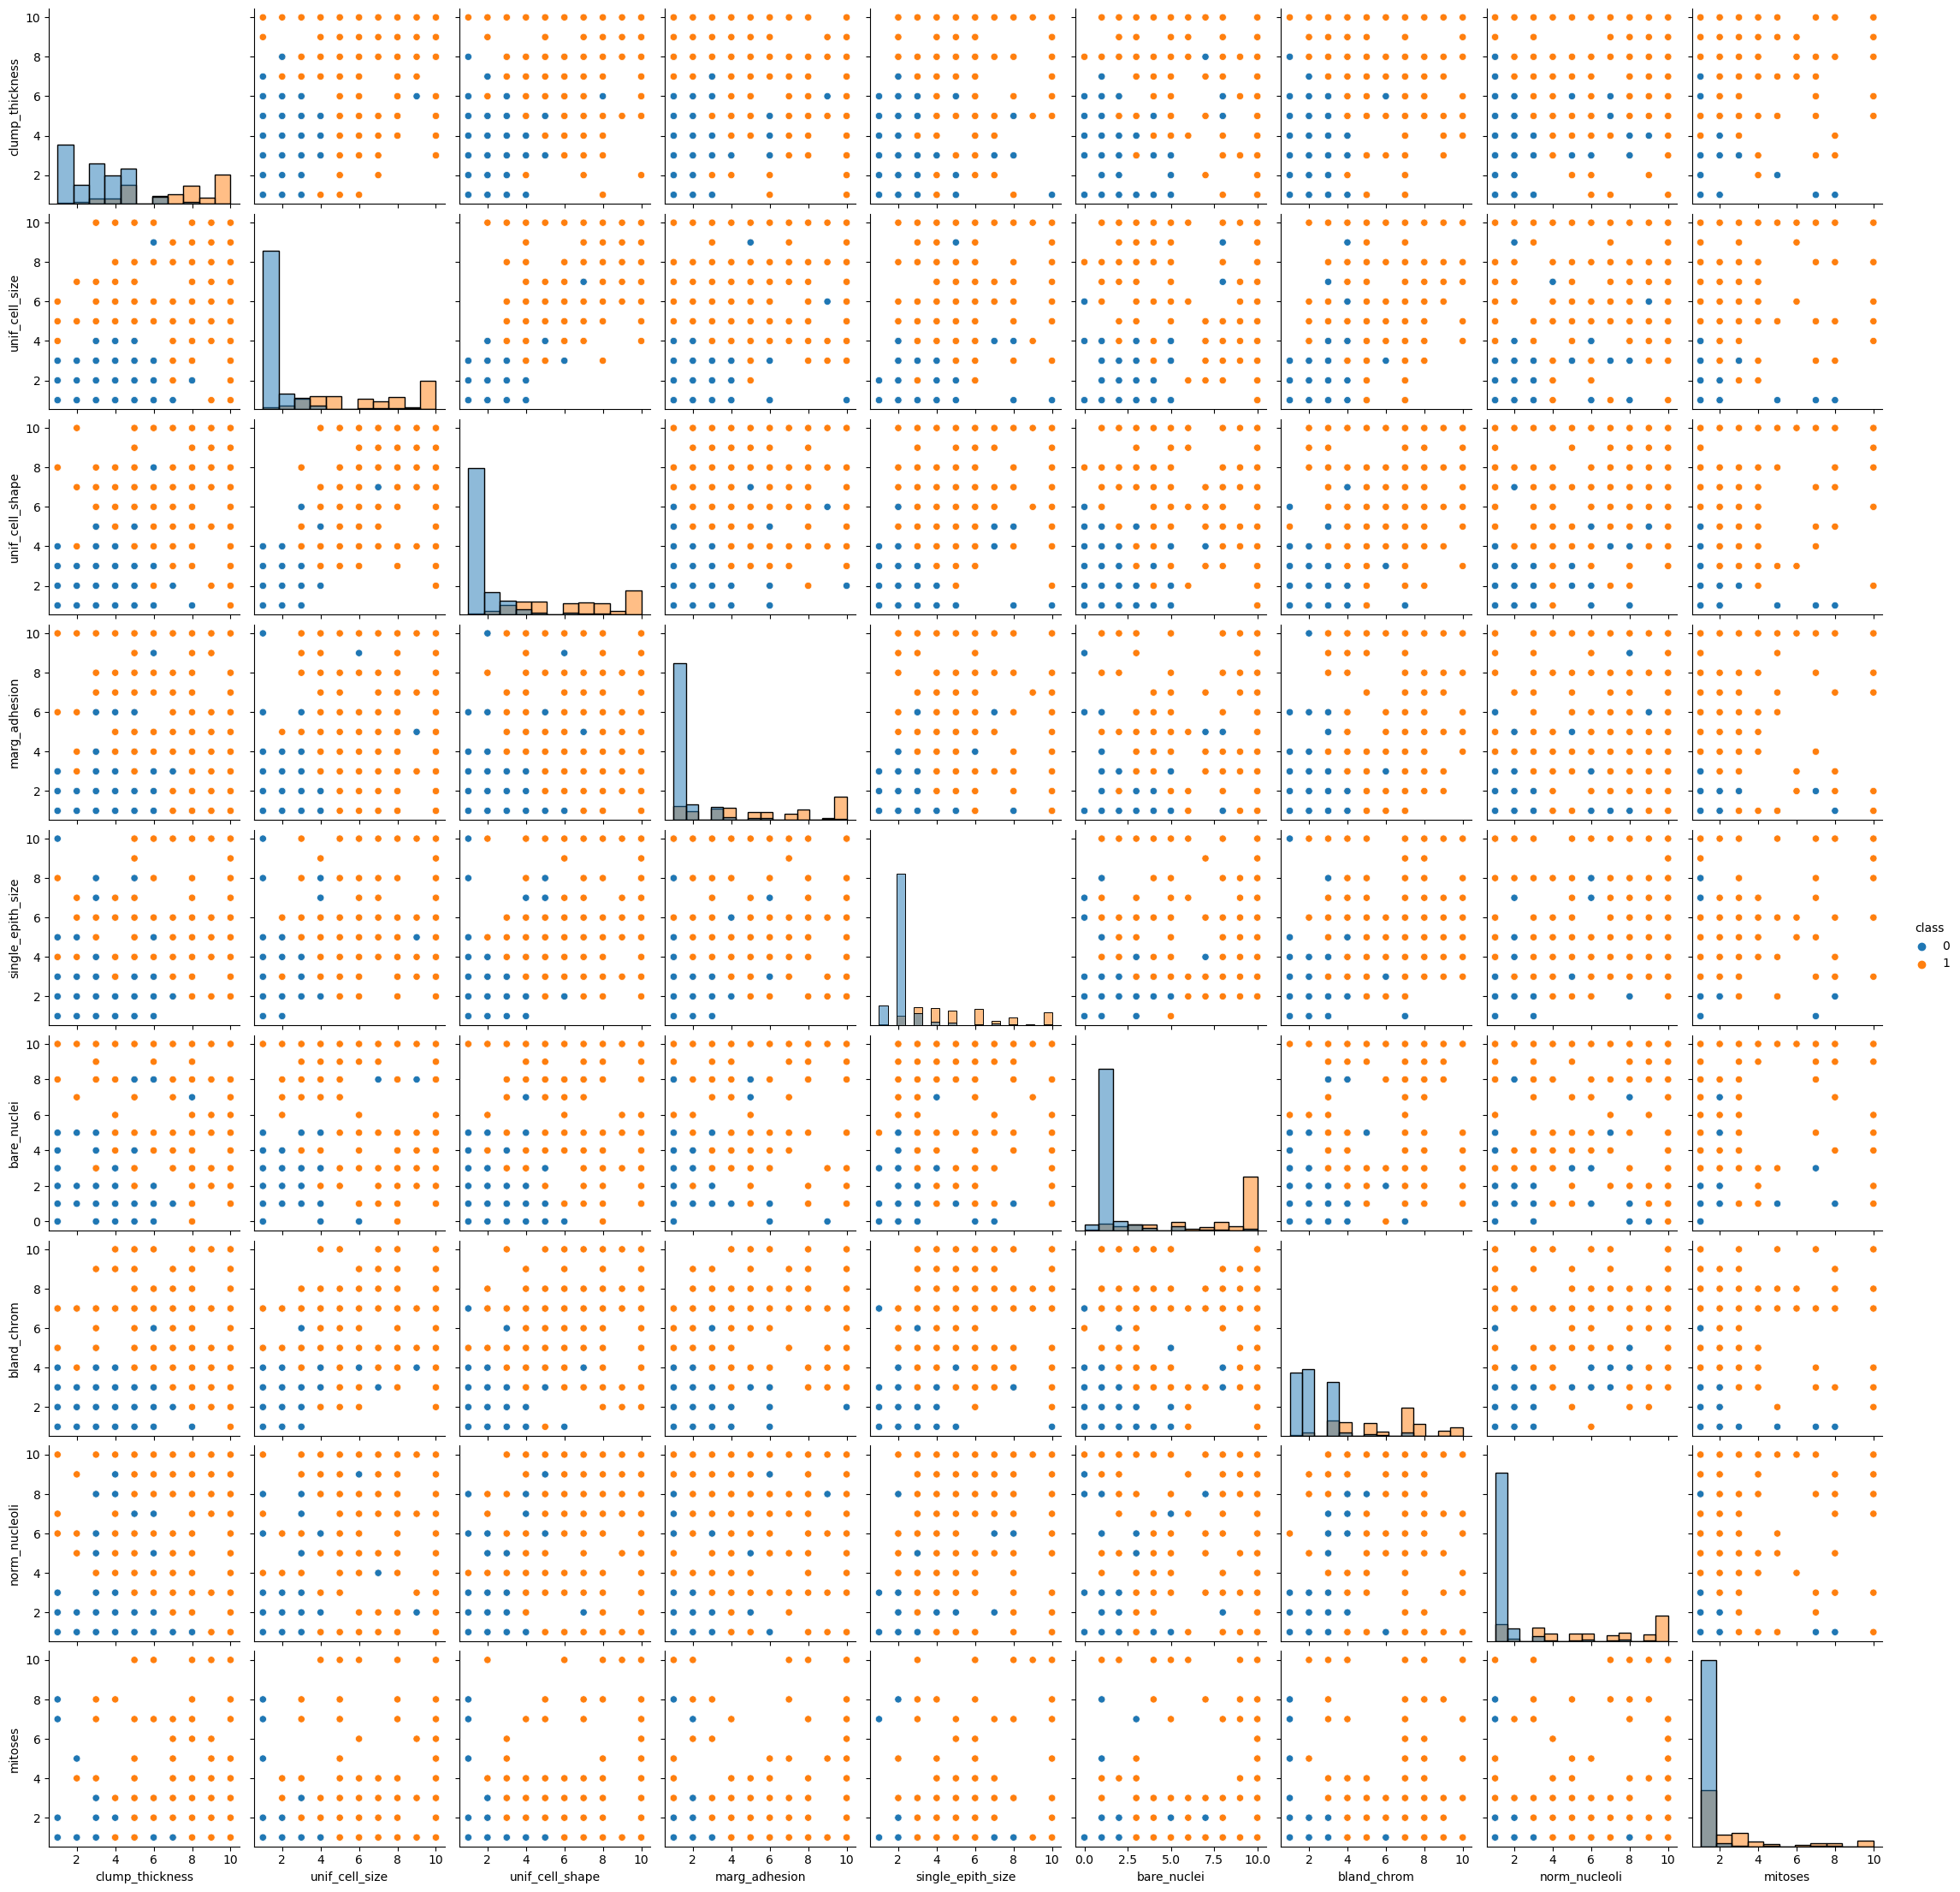

In [41]:
sns.pairplot(df, hue="class", diag_kind="hist")

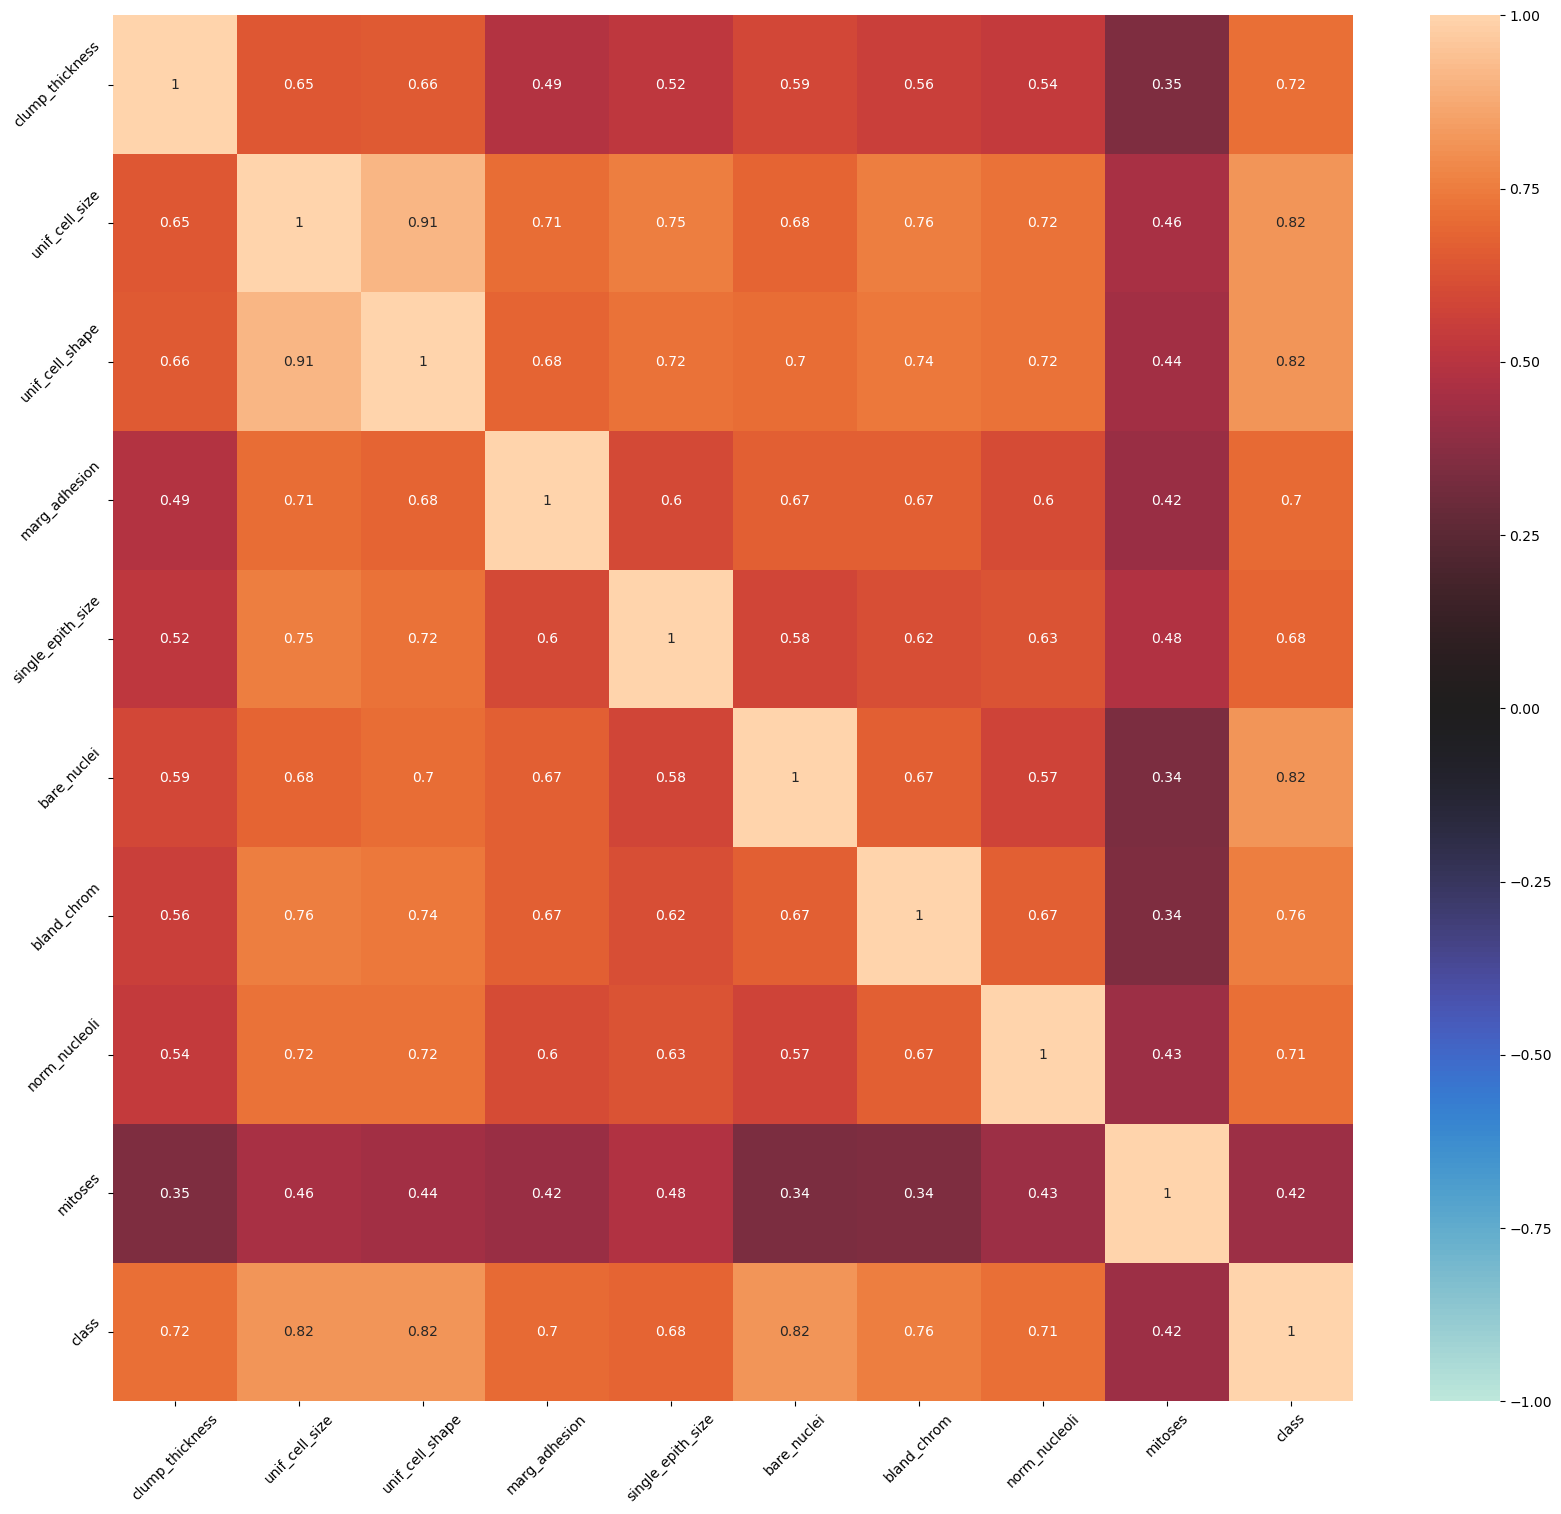

In [42]:
plt.figure(figsize=(20, 18))
corr = df.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, annot=True)
ax.tick_params(axis='x', rotation=45)
ax.tick_params(axis='y', rotation=45)

# Setting Parameters before loading data

In [43]:
IMAGE_SIZE = 96
IMAGE_CHANNELS = 3
SAMPLE_SIZE = 80000  # the number of images we use from each of the two classes
TRAIN_IMAGE_PATH = 'input/train/'
TEST_IMAGE_PATH = 'input/test'

In [44]:
# Function for Showing images with both classes randomly
def draw_category_images(col_name, figure_cols, df, IMAGE_PATH):
    """
    Give a column in a dataframe,
    this function takes a sample of each class and displays that
    sample on one row. The sample size is the same as figure_cols which
    is the number of columns in the figure.
    Because this function takes a random sample, each time the function is run it
    displays different images.
    """

    categories = (df.groupby([col_name])[col_name].nunique()).index
    f, ax = plt.subplots(nrows=len(categories), ncols=figure_cols,
                         figsize=(4 * figure_cols, 4 * len(categories)))  # adjust size here
    # draw a number of images for each location
    for i, cat in enumerate(categories):
        sample = df[df[col_name] == cat].sample(figure_cols)  # figure_cols is also the sample size
        for j in range(0, figure_cols):
            file = IMAGE_PATH + sample.iloc[j]['id'] + '.tif'
            im = cv2.imread(file)
            ax[i, j].imshow(im, resample=True, cmap='gray')
            ax[i, j].set_title(cat, fontsize=16)
    plt.tight_layout()
    plt.show()

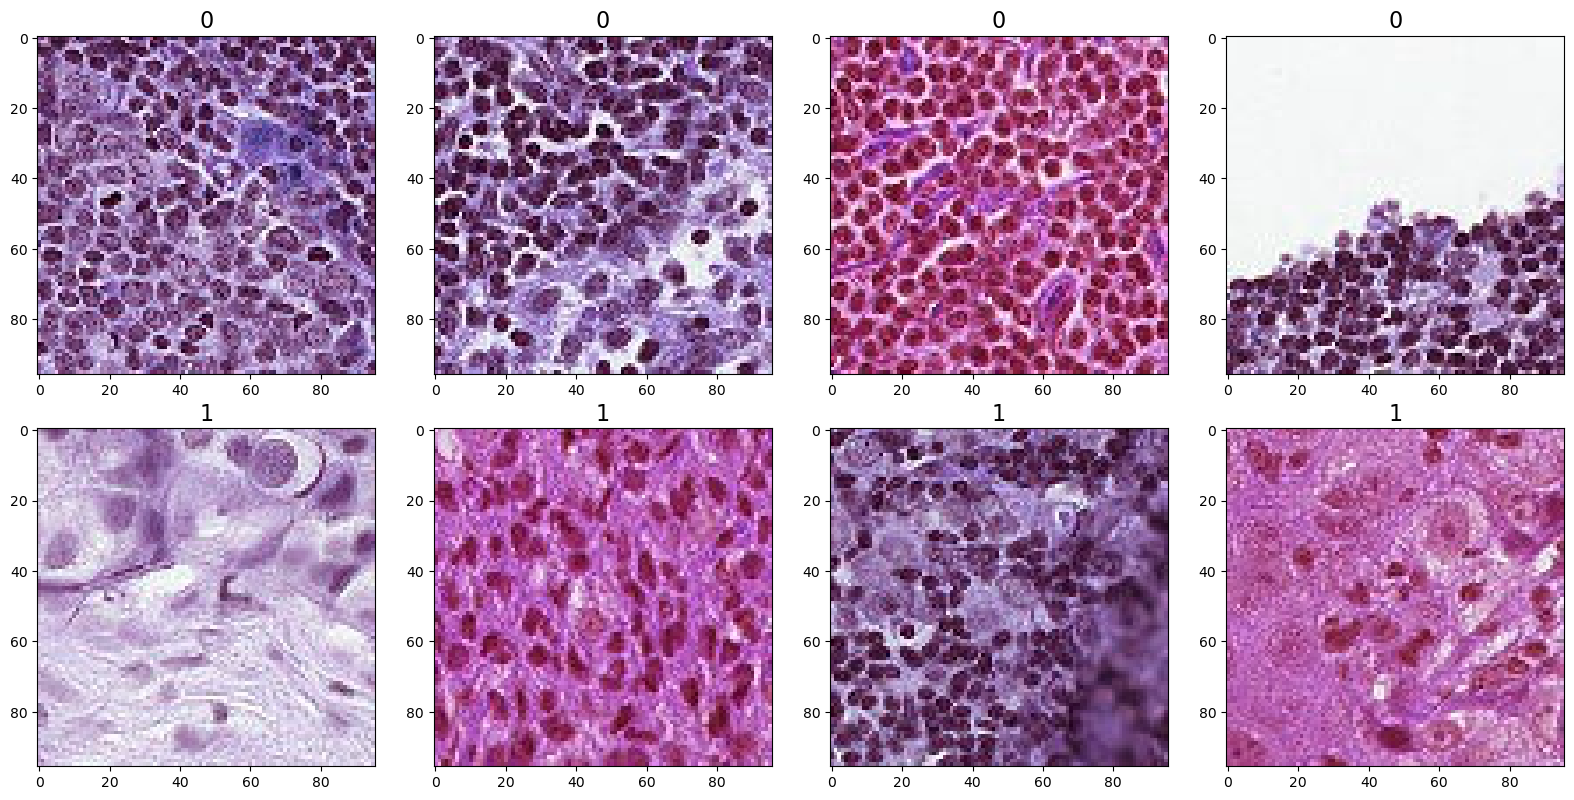

In [45]:
# Displaying 4 images in each class
draw_category_images('label', 4, df_data, TRAIN_IMAGE_PATH)

Text(0.5, 0, '')

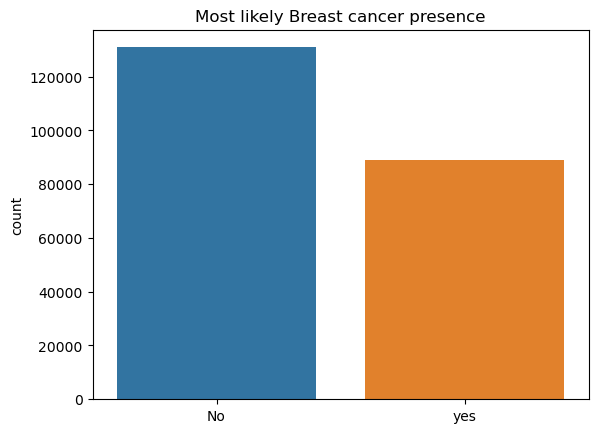

In [46]:
f = sns.countplot(x='label', data=df_data)
f.set_title("Most likely Breast cancer presence")
f.set_xticklabels(['No', 'yes'])
plt.xlabel("")

In [47]:
# prepare data for training
def append_tif(string):
    return string + ".tif"


df_data["id"] = df_data["id"].apply(append_tif)
df_data['label'] = df_data['label'].astype(str)

In [48]:
df_train, df_val = train_test_split(df_data, test_size=0.20, random_state=101, stratify=df_data['label'])

In [49]:
df_train.shape

(176020, 2)

In [50]:
df_val.shape

(44005, 2)

In [51]:
train_batch_size = 32
val_batch_size = 32

In [52]:
# Using ImageDataGenerator for loading images
datagen = ImageDataGenerator(rescale=1.0 / 255, validation_split=0.20)

In [53]:
train_gen = datagen.flow_from_dataframe(dataframe=df_train,
                                        directory=TRAIN_IMAGE_PATH,
                                        x_col='id',
                                        y_col='label',
                                        batch_size=train_batch_size,
                                        seed=1,
                                        shuffle=True,
                                        class_mode='binary',
                                        target_size=(IMAGE_SIZE, IMAGE_SIZE))

Found 176020 validated image filenames belonging to 2 classes.


In [54]:
val_gen = datagen.flow_from_dataframe(dataframe=df_val,
                                      directory=TRAIN_IMAGE_PATH,
                                      x_col='id',
                                      y_col='label',
                                      batch_size=train_batch_size,
                                      seed=1,
                                      shuffle=True,
                                      class_mode='binary',
                                      target_size=(IMAGE_SIZE, IMAGE_SIZE))

Found 44005 validated image filenames belonging to 2 classes.


In [55]:
# Defining steps with batch size and samples
train_steps = np.ceil(len(train_gen) / train_batch_size)
val_steps = np.ceil(len(val_gen) / val_batch_size)

In [57]:
# Model Params
kernel_size = (3, 3)
pool_size = (2, 2)
first_filters = 32
second_filters = 64
third_filters = 128
fourth_filter = 256
dropout_conv = 0.25

# Model Structure

In [58]:
# initial model with 4 sets of 2 convolutional layers
model = Sequential()
model.add(Conv2D(first_filters, kernel_size, padding='same', input_shape=(96, 96, 3)))
model.add(Activation('relu'))
model.add(Conv2D(first_filters, kernel_size))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size))
model.add(BatchNormalization())

model.add(Conv2D(second_filters, kernel_size))
model.add(Activation('relu'))
model.add(Conv2D(second_filters, kernel_size))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size))
model.add(BatchNormalization())

model.add(Conv2D(third_filters, kernel_size))
model.add(Activation('relu'))
model.add(Conv2D(third_filters, kernel_size))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size))
model.add(BatchNormalization())

model.add(Conv2D(fourth_filter, kernel_size))
model.add(Activation('relu'))
model.add(Conv2D(fourth_filter, kernel_size))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dropout(dropout_conv))
model.add(Dense(512))
model.add(Activation('relu'))

model.add(Dropout(dropout_conv))
model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dropout(dropout_conv))
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dropout(dropout_conv))
model.add(Dense(1, activation='sigmoid'))
opt = tf.keras.optimizers.Adam(0.001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 32)        896       
                                                                 
 activation (Activation)     (None, 96, 96, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 94, 94, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 94, 94, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 47, 47, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 47, 47, 32)       128       
 ormalization)                                          

In [59]:
# Compliling the model
model.compile(Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [60]:
model_file_path = "train_model.h5"
# Checkpoint to save weights after every epoch
checkpoint = ModelCheckpoint(model_file_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [61]:
# It alters the learning rate based on metrics in each epoch
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=2, verbose=1, mode='max', min_lr=0.00001)

In [62]:
callbacks_list = [checkpoint, reduce_lr]

In [63]:
# Fitting the model
history = model.fit_generator(train_gen, steps_per_epoch=train_steps,
                              validation_data=val_gen,
                              validation_steps=val_steps,
                              epochs=30, verbose=1,
                              callbacks=callbacks_list)

C:\Users\dragh\AppData\Local\Temp\ipykernel_3976\1452025834.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_gen, steps_per_epoch=train_steps,


Epoch 1/30
172/172 [==============================] - ETA: 0s - loss: 0.5802 - accuracy: 0.7238
Epoch 1: val_accuracy improved from -inf to 0.54433, saving model to train_model.h5
172/172 [==============================] - 223s 1s/step - loss: 0.5802 - accuracy: 0.7238 - val_loss: 0.6960 - val_accuracy: 0.5443 - lr: 1.0000e-04
Epoch 2/30
172/172 [==============================] - ETA: 0s - loss: 0.5234 - accuracy: 0.7564
Epoch 2: val_accuracy did not improve from 0.54433
172/172 [==============================] - 232s 1s/step - loss: 0.5234 - accuracy: 0.7564 - val_loss: 1.3333 - val_accuracy: 0.4462 - lr: 1.0000e-04
Epoch 3/30
172/172 [==============================] - ETA: 0s - loss: 0.4850 - accuracy: 0.7738
Epoch 3: val_accuracy did not improve from 0.54433

Epoch 3: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
172/172 [==============================] - 220s 1s/step - loss: 0.4850 - accuracy: 0.7738 - val_loss: 1.0386 - val_accuracy: 0.5225 - lr: 1.0000e-04
Ep

172/172 [==============================] - 144s 837ms/step - loss: 0.3776 - accuracy: 0.8378 - val_loss: 0.3803 - val_accuracy: 0.8336 - lr: 1.0000e-05
Epoch 27/30
172/172 [==============================] - ETA: 0s - loss: 0.3965 - accuracy: 0.8314
Epoch 27: val_accuracy did not improve from 0.86555
172/172 [==============================] - 145s 845ms/step - loss: 0.3965 - accuracy: 0.8314 - val_loss: 0.3729 - val_accuracy: 0.8365 - lr: 1.0000e-05
Epoch 28/30
172/172 [==============================] - ETA: 0s - loss: 0.3779 - accuracy: 0.8383
Epoch 28: val_accuracy did not improve from 0.86555
172/172 [==============================] - 146s 848ms/step - loss: 0.3779 - accuracy: 0.8383 - val_loss: 0.3676 - val_accuracy: 0.8416 - lr: 1.0000e-05
Epoch 29/30
172/172 [==============================] - ETA: 0s - loss: 0.3827 - accuracy: 0.8356
Epoch 29: val_accuracy did not improve from 0.86555
172/172 [==============================] - 142s 825ms/step - loss: 0.3827 - accuracy: 0.8356 - va

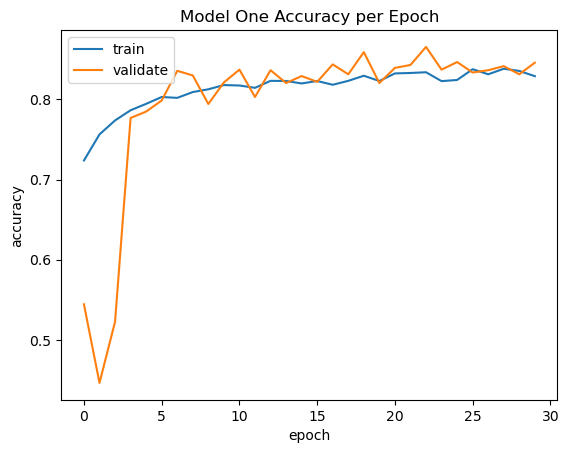

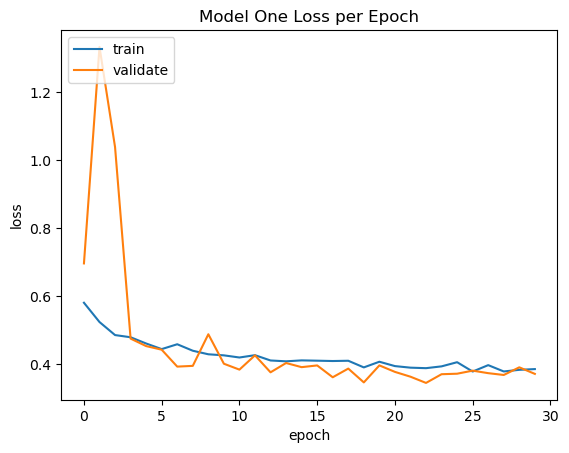

In [64]:
# plot model accuracy per epoch 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model One Accuracy per Epoch')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show();

# plot model loss per epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model One Loss per Epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show();

In [65]:
# Loading Weights file
model.load_weights('train_model.h5')

In [66]:
val_loss, val_acc = model.evaluate_generator(val_gen, steps=len(df_val))

C:\Users\dragh\AppData\Local\Temp\ipykernel_3976\3980974495.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  val_loss, val_acc = model.evaluate_generator(val_gen, steps=len(df_val))


In [67]:
val_loss
val_acc

0.8431541919708252

In [68]:
val_gen1 = datagen.flow_from_dataframe(dataframe=df_val,
                                      directory=TRAIN_IMAGE_PATH,
                                      x_col='id',
                                      y_col=None,
                                      batch_size=train_batch_size,
                                      seed=1,
                                      shuffle=False,
                                      class_mode=None,
                                      target_size=(IMAGE_SIZE, IMAGE_SIZE))

Found 44005 validated image filenames.


In [69]:
predictions = model.predict_generator(val_gen1, verbose=1)
predictions

C:\Users\dragh\AppData\Local\Temp\ipykernel_3976\3447348644.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(val_gen1, verbose=1)


1376/1376 [==============================] - 531s 385ms/step


array([[0.0196404 ],
       [0.26837173],
       [0.3156871 ],
       ...,
       [0.12437484],
       [0.7640433 ],
       [0.92891496]], dtype=float32)

In [70]:
y_true=val_gen.classes
y_true

[0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,


In [71]:
prediction = []

for pred in predictions:
     if pred >= 0.5:
        prediction.append(1)
     else:
         prediction.append(0)
prediction

[0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,


In [72]:
accuracy_score(y_true, prediction)

0.8431541870242018

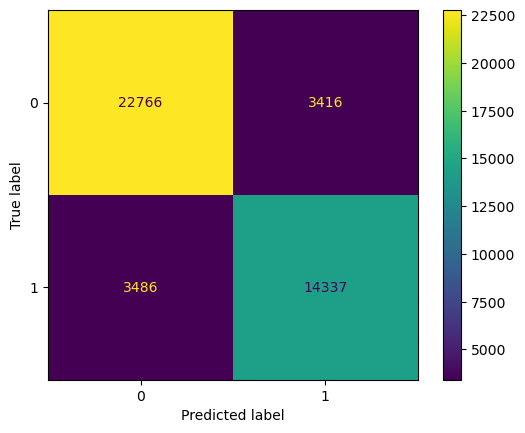

In [73]:
confusion_matrix = metrics.confusion_matrix(y_true, prediction)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["0", "1"])

cm_display.plot()

In [74]:
test_path = 'input/test'
import os
test_df = pd.DataFrame({'id': os.listdir(test_path)})
print(test_df.head())

                                             id
0  00006537328c33e284c973d7b39d340809f7271b.tif
1  0000ec92553fda4ce39889f9226ace43cae3364e.tif
2  00024a6dee61f12f7856b0fc6be20bc7a48ba3d2.tif
3  000253dfaa0be9d0d100283b22284ab2f6b643f6.tif
4  000270442cc15af719583a8172c87cd2bd9c7746.tif


In [75]:
# Note: shuffle=False causes the test dataset to not be shuffled
test_gen = datagen.flow_from_dataframe(dataframe=test_df,
                                       directory='input/test',
                                       x_col='id',
                                       y_col=None,
                                       batch_size=32,
                                       seed=1,
                                       shuffle=False,
                                       class_mode=None,
                                       target_size=(IMAGE_SIZE, IMAGE_SIZE))

Found 57458 validated image filenames.


In [76]:
test_steps = np.ceil(len(test_gen) / 32)
test_images_path = len(os.listdir(test_path))
predictions = model.predict_generator(test_gen, verbose=1)

C:\Users\dragh\AppData\Local\Temp\ipykernel_3976\3719449611.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_gen, verbose=1)


1796/1796 [==============================] - 877s 488ms/step


In [77]:
prediction = []

for pred in predictions:
    if pred >= 0.5:
        prediction.append(1)
    else:
        prediction.append(0)
prediction

[1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,


In [78]:
submission = pd.DataFrame({'id':os.listdir(test_path), 
                           'label':prediction, 
                          }).set_index('id')
submission.head()


,label
id,
00006537328c33e284c973d7b39d340809f7271b.tif,1
0000ec92553fda4ce39889f9226ace43cae3364e.tif,1
00024a6dee61f12f7856b0fc6be20bc7a48ba3d2.tif,1
000253dfaa0be9d0d100283b22284ab2f6b643f6.tif,0
000270442cc15af719583a8172c87cd2bd9c7746.tif,0


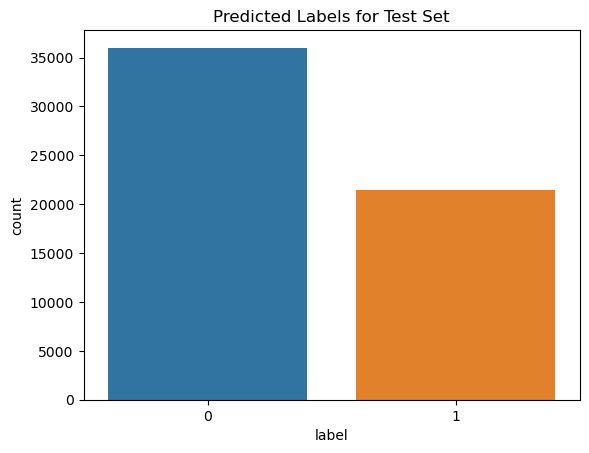

In [79]:
#plot test predictions
sns.countplot(data=submission, x='label').set(title='Predicted Labels for Test Set');